# Práctica 4: Regresión Polinomial
***
Rodriguez Nuñez Diego Eduardo

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Programa 1

1. Para este programa se utilizará el dataset <i>datos.csv</i>
2. Divide <i>datos.csv</i> en 70% para entrenamiento y 30% para pruebas, con los parámetros shuffle=True y random_state=0
3. Con las bibliotecas de scikit-learn realiza las siguientes regresiones:
    * Regresión lineal con OLS
    * Regresión polinomial de grado 2 con OLS
    * Regresión polinomial de grado 3 con OLS
    * Regresión lineal con SGD
    * Regresión polinomial de grado 2 con SGD
    * Regresión polinomial de grado 3 con SGD
4. Entrada 
    * <i>datos.csv</i>, para SGD: número de iteraciones y alpha
5. Salida
    * Una gráfica para cada regresión con los siguientes elementos:
        * Distribución de datos de prueba
        * (X_test,y_pred) //En el caso de regresión polinomial ordenar los datos antes de pintar la curva predicha
    * Resumen de los resultados
6. Bibliotecas de scikit-learn
    * from sklearn.linear_model import LinearRegression
    * from sklearn.linear_model import SGDRegressor
    * from sklearn.preprocessing import PolynomialFeatures
    * from sklearn.metrics import mean_squared_error, r2_score
    * import operator

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

In [3]:
def Resumen(x_test, y_test,regresion):
    prediction = regresion.predict(x_test.reshape(-1,1))
    mse = mean_squared_error(y_test, prediction)
    r2 = r2_score(y_test, prediction)
    return mse, r2

def Grafica_Regresion(x_test,y_test,y_pred,title):
    plt.scatter(x_test, y_test, color='blue',label='Datos de prueba')
    plt.plot(x_test, y_pred, color='red', label='Predicción')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.legend()
    plt.show()

def RegresionOLS(x_train,y_train,x_test,y_test):
    regresionL = LinearRegression()
    regresionL.fit(x_train.reshape(-1,1), y_train)
    regresionL_OLSmse, regresionL_OLSr2 = Resumen(x_test, y_test,regresionL)
    print(f'Regresion Lineal con OLS: \t mse={regresionL_OLSmse} \t r2={regresionL_OLSr2}')
    y_pred = regresionL.predict(x_test.reshape(-1,1))
    Grafica_Regresion(x_test,y_test,y_pred,'Regresion Lineal con OLS')

    for grado in range(2,4):
        regresionL_OLSpoly = make_pipeline(PolynomialFeatures(degree=grado), LinearRegression())
        regresionL_OLSpoly.fit(x_train.reshape(-1,1), y_train)
        regresionL_OLSpolymse, regresionL_OLSpolyr2 = Resumen(x_test, y_test,regresionL_OLSpoly)
        print(f'Regresion Polinomial con OLS grado {grado}: \t mse={regresionL_OLSpolymse} \t r2={regresionL_OLSpolyr2}')
        indices = np.argsort(x_test)
        y_pred = regresionL_OLSpoly.predict(x_test[indices].reshape(-1,1))
        Grafica_Regresion(x_test[indices],y_test[indices],y_pred,f'Regresion Polinomial con OLS de grado {grado}')

def RegresionSGD(x_train,y_train,x_test,y_test,alpha,iterations):
    regresionSGD = SGDRegressor(alpha=alpha, max_iter=iterations)
    regresionSGD.fit(x_train.reshape(-1,1), y_train)
    regresionSGDmse, regresionSGDr2 = Resumen(x_test, y_test,regresionSGD)
    print(f'Regresion Lineal con SGD: \t mse={regresionSGDmse} \t r2={regresionSGDr2}')
    y_pred = regresionSGD.predict(x_test.reshape(-1,1))
    Grafica_Regresion(x_test,y_test,y_pred,'Regresion Lineal con SGD')

    for grado in range(2,4):
        regresionSGDpoly = make_pipeline(PolynomialFeatures(degree=grado), SGDRegressor(alpha=alpha, max_iter=iterations))
        regresionSGDpoly.fit(x_train.reshape(-1,1), y_train)
        regresionSGDpolymse, regresionSGDpolyr2 = Resumen(x_test, y_test,regresionSGDpoly)
        print(f'Regresion Polinomial con SGD grado {grado}: \t mse={regresionSGDpolymse} \t r2={regresionSGDpolyr2}')
        indices = np.argsort(x_test)
        y_pred = regresionSGDpoly.predict(x_test[indices].reshape(-1,1))
        Grafica_Regresion(x_test[indices],y_test[indices],y_pred,f'Regresion Polinomial con SGD de grado {grado}')

In [4]:
data = pd.read_csv('datos.csv')
data

,x,y
0,-3.292157,-44.608971
1,-0.936214,0.623178
2,-3.602674,-58.873048
3,-0.850265,-6.057589
4,2.309657,-3.967128
...,...,...
95,5.878571,36.139165
96,2.117848,-8.607422
97,0.430170,-3.414761
98,-0.315372,-1.059461


In [5]:
x = data['x'].values
y = data['y'].values
x,y

(array([-3.29215704, -0.93621395, -3.60267397, -0.85026525,  2.30965656,
         1.56786929, -0.28311318,  0.6684103 , -2.48223722,  1.0607969 ,
         9.65896945, -0.5933086 , -4.80926387,  1.86272445, -2.59833764,
         1.53515772,  4.66335724,  3.04373645, -1.69087204,  3.16198045,
         5.1456589 ,  7.11881057,  3.52895655,  5.75838608,  6.84169354,
         4.68639968,  3.53241541,  2.08454669,  1.80044833,  3.90296628,
         4.01738134,  4.43943885,  1.46772157,  6.89059504,  4.72189509,
        -0.18727169, -1.41820205,  0.79297508,  4.61239145,  2.9346576 ,
         5.49544952,  0.60301268, -2.46475658, -1.53633871,  5.21225786,
         3.20953084,  1.37517507,  0.93090081,  1.96849994,  1.61926372,
        -3.64945209,  5.811455  ,  5.51937022,  3.24085694, -3.76882608,
        -3.60267688,  4.58367706,  2.80401011, -0.8417559 ,  0.15776189,
         0.87072341,  1.10528548,  4.08370358,  3.30546066, -0.01688427,
         4.30974822,  4.02299798,  3.90753824,  0.2

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, shuffle=True)    

Regresion Lineal con OLS: 	 mse=296.0945867766399 	 r2=0.7198048208163852


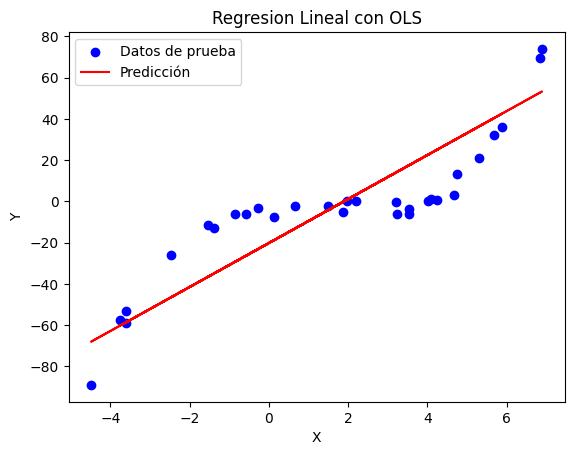

Regresion Polinomial con OLS grado 2: 	 mse=352.43738401011177 	 r2=0.6664874659184123


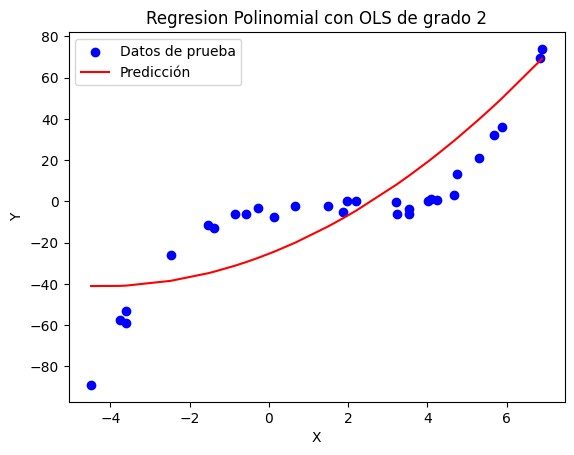

Regresion Polinomial con OLS grado 3: 	 mse=8.487854131822635 	 r2=0.9919679186464004


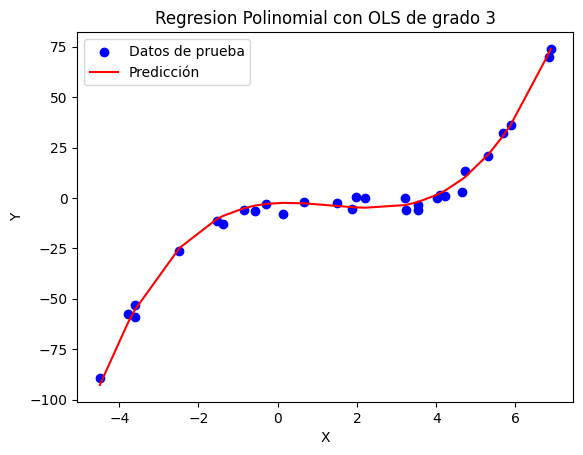

In [7]:
RegresionOLS(x_train,y_train,x_test,y_test)

Regresion Lineal con SGD: 	 mse=446.4921254175731 	 r2=0.5774831872227935


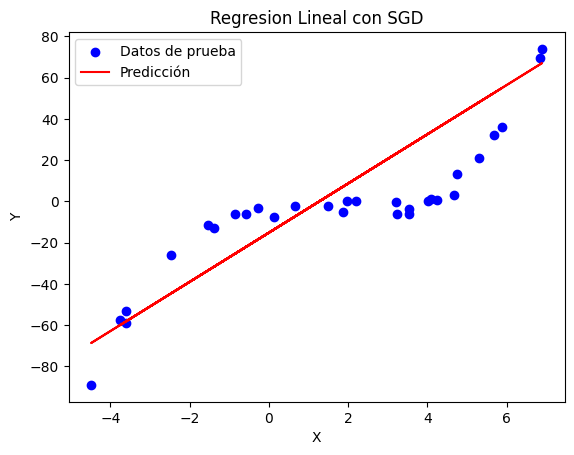

Regresion Polinomial con SGD grado 2: 	 mse=736.9291977914003 	 r2=0.30264173057455834


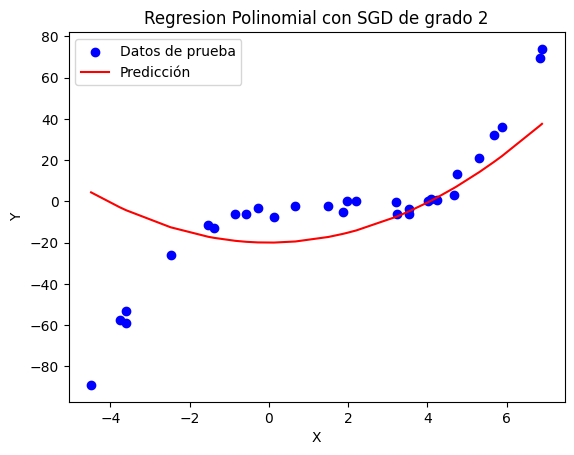

Regresion Polinomial con SGD grado 3: 	 mse=1.2517684231341218e+27 	 r2=-1.184552144079006e+24


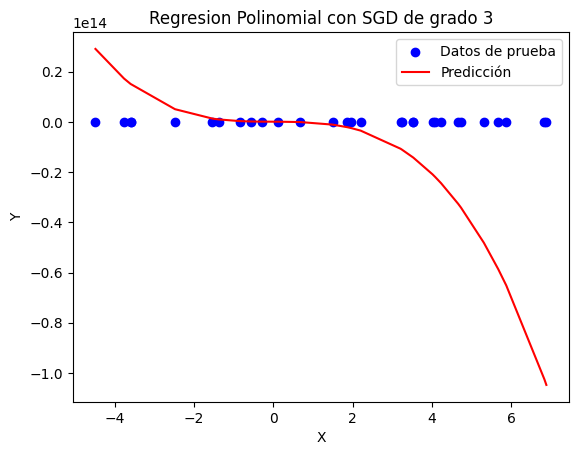

In [9]:
RegresionSGD(x_train,y_train,x_test,y_test,0.01,1000)